In [110]:
from tqdm.notebook import tqdm
import numpy as np
import random

N_BANDITS = 3
N_EPISODES = 100
N_MAX_STEPS_PER_EPISODE = 1_000

SIGNAL_WIN = 0
SIGNAL_LOST = 1

SEED = 0

random.seed(SEED)
np.random.seed(SEED)

In [111]:
class BanditEnvironment:
    def __init__(self, n_bandits):    
        self.n_bandits = n_bandits
        
        # TODO: Modify this line so that each bandit hits the jackpot 0-20% of the time, randomly  
        self.bandits = None
        
        # TODO: Modifiy this percentage to a higher value (e.g. 60%) for a randomly selected bandit
        self.bandits[None] = 0.6
        
        print("Generated probabilities:", [b for b in self.bandits])
    
    def reset(self):
        return 0
    
    def step(self, action):
        # TODO: Take the bandit that the agent has selected
        p_win = None
        
        # TODO: Pull the lever (generate a random result based on the probibilites of the selected bandit)
        pull_result = None

        # TODO: Set the reward variable to 1 if the player hit the jackpot, 0 otherwise
        reward = None
        
        new_state = 0
        done = False
        
        return new_state, reward, done

In [112]:
class RandomAgent:
    def __init__(self, n_actions):
        self.n_actions = n_actions
    
    def act(self, state):
        # TODO: Take a random action
        return None

In [113]:
env = BanditEnvironment(n_bandits=N_BANDITS)

agent = RandomAgent(n_actions=N_BANDITS)

In [1]:
rewards = []

for episode in tqdm(range(N_EPISODES)):
    # Reset the environment
    state = env.reset()
    done = False
    
    # We will store the cumulated reward in this variable
    total_reward = 0
    
    for step in range(N_MAX_STEPS_PER_EPISODE):
        # Ask the agent for the next action
        action = agent.act(state=state)

        # Execute the action selected by the agent
        # We get:
        # - the new state s_{t+1}
        # - the reward r_{t+1}
        # - a flag that indicates whether if the episode has ended or not
        new_state, reward, done = env.step(action)
        
        # We store the obtained reward
        total_reward += reward

        # If the episode has finished, we exit the for loop
        if done:
            break
            
        # We update the current state:
        # s_{t} = s_{t+1}
        state = new_state
        
    #print(f"Total reward for episode {episode}: {total_reward}")
    
    rewards.append(total_reward)

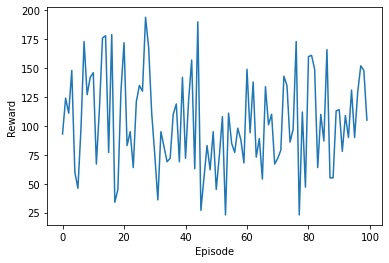

In [115]:
import matplotlib.pyplot as plt

plt.plot(range(N_EPISODES), rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()